<a href="https://colab.research.google.com/github/wangpouwei/Paul/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


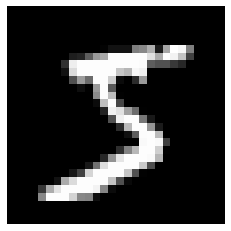

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#idx for index
idx = 0
plt.imshow(x_train[idx], cmap="gray")
plt.axis("off")
pd.DataFrame(x_train[idx])

In [ ]:
#地基(model): Sequential(一層一層), model自由
#層(Layer): Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    Dense(128, activation="relu", input_dim=784),
    Dense(10, activation="sigmoid")
]
model = Sequential(layers)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile(確定模型)
# 1個神經元：BinaryCrossEntropy plog(1/q) + (1-p)log(1/1-q)
# 多個神經元：sigmoid`, CategoricalCrossEntropy sigma pilog(1/q)
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss = CategoricalCrossentropy(),
             optimizer= "adam",
             metrics= ["accuracy"] )

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# x:  攤平，Scaling to 0-1(配合tensorflow)
# reshape: 可以在某個位置設為-1，讓他自己算
x_train_norm = x_train.reshape(60000, 784)/ 255.0
x_test_norm = x_test.reshape(10000, 784)/ 255.0

In [ ]:
# epochs:整份資料看幾次
# epoch + validation : 甚麼時候停?(val_loss平滑的時候停下來)
# epoch: 60000*0.9 = 54000/200 =270
# verbose: 1:有進度條  2沒進度條  0全部不印出來
# restore_best_weights=True 回到最好的位置
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
          y_train_cat,
          batch_size=200,
          epochs= 50,
          validation_split=0.1,
          callbacks=callbacks,
          verbose=2)

Epoch 1/50
270/270 - 2s - loss: 0.4329 - accuracy: 0.8819 - val_loss: 0.1925 - val_accuracy: 0.9483 - 2s/epoch - 7ms/step
Epoch 2/50
270/270 - 1s - loss: 0.2009 - accuracy: 0.9418 - val_loss: 0.1387 - val_accuracy: 0.9642 - 1s/epoch - 5ms/step
Epoch 3/50
270/270 - 1s - loss: 0.1490 - accuracy: 0.9570 - val_loss: 0.1206 - val_accuracy: 0.9663 - 1s/epoch - 5ms/step
Epoch 4/50
270/270 - 1s - loss: 0.1179 - accuracy: 0.9664 - val_loss: 0.1068 - val_accuracy: 0.9703 - 1s/epoch - 5ms/step
Epoch 5/50
270/270 - 1s - loss: 0.0962 - accuracy: 0.9725 - val_loss: 0.0969 - val_accuracy: 0.9743 - 1s/epoch - 5ms/step
Epoch 6/50
270/270 - 1s - loss: 0.0825 - accuracy: 0.9765 - val_loss: 0.0925 - val_accuracy: 0.9748 - 1s/epoch - 5ms/step
Epoch 7/50
270/270 - 1s - loss: 0.0705 - accuracy: 0.9796 - val_loss: 0.0864 - val_accuracy: 0.9760 - 1s/epoch - 5ms/step
Epoch 8/50
270/270 - 1s - loss: 0.0602 - accuracy: 0.9831 - val_loss: 0.0866 - val_accuracy: 0.9757 - 1s/epoch - 5ms/step
Epoch 9/50
270/270 - 1s 

In [ ]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9778


[0.07481709867715836, 0.9778000116348267]

In [ ]:
pre = model.predict(x_test_norm).argmax(axis=1)
pre

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_pre = pre[idx]
false_img = x_test[idx]
false_true = y_test[idx]
plt.figure(figsize=(14,42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
  plt.subplot(height, width, i+1)
  t = "[P]:{}\n[T]{}".format(false_pre[i], false_true[i])
  plt.title(t)
  plt.axis("off")
  plt.imshow(false_img[i], cmap="gray")